# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [1]:
library ('tidyverse')
canada_wind_turbine = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv')
canada_wind_turbine |> head()

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 6698 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): province_territory, project_name, turbine_identifier, turbine_numbe...
dbl (7): objectid, total_project_capacity_mw, turbine_rated_capacity_k_w, ro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet th

objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

In [2]:
canada_wind_turbine |> count(province_territory) 

province_territory,n
<chr>,<int>
Alberta,900
British Columbia,292
Manitoba,133
New Brunswick,119
Newfoundland and Labrador,27
Northwest Territories,4
Nova Scotia,310
Ontario,2663
Prince Edward Island,104


In [6]:
canada_wind_turbine2 = canada_wind_turbine |> 
    mutate(province_territory = province_territory |> fct_infreq() |> fct_rev())

canada_wind_turbine2 |> pull(province_territory) |> levels()

[1] "Yukon"                     "Northwest Territories"    
 [3] "Newfoundland and Labrador" "Prince Edward Island"     
 [5] "New Brunswick"             "Manitoba"                 
 [7] "Saskatchewan"              "British Columbia"         
 [9] "Nova Scotia"               "Alberta"                  
[11] "Quebec"                    "Ontario"

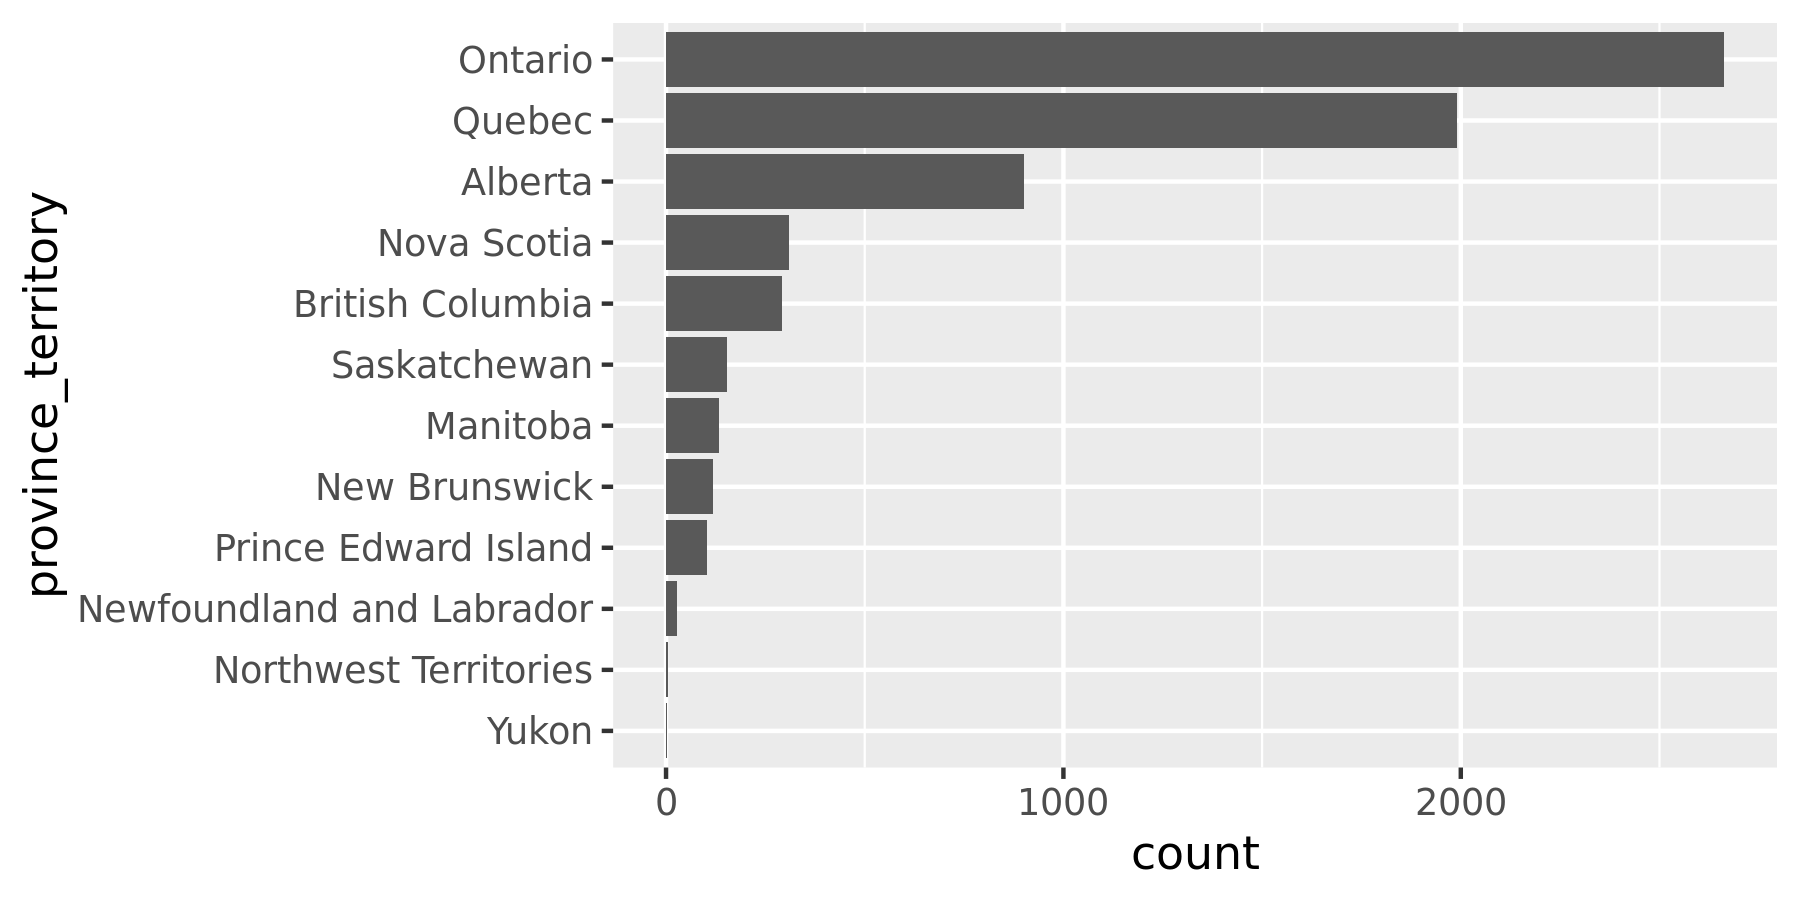

In [32]:
options(repr.plot.width=6, repr.plot.height=, repr.plot.res = 300)
p = ggplot(canada_wind_turbine2, aes(y=province_territory)) + geom_bar()
p

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

In [8]:
canada_wind_turbine |> count(manufacturer) 

manufacturer,n
<chr>,<int>
Acciona,34
Acciona Wind Power,40
Bonus,2
DeWind,5
EWT,2
Enercon,960
GE,1725
Gamesa,8
Lagerwey,2


In [9]:
canada_wind_turbine3 = canada_wind_turbine |> 
    mutate(manufacturer = manufacturer |> fct_infreq() |> fct_rev())

canada_wind_turbine3 |> pull(manufacturer) |> levels()

[1] "Tacke"                    "Pfleiderer"              
 [3] "Leitwind"                 "Lagerwey"                
 [5] "EWT"                      "Bonus"                   
 [7] "Turbowinds"               "Northwind"               
 [9] "Samsung Renewable Energy" "DeWind"                  
[11] "Windmatic"                "Gamesa"                  
[13] "Vensys"                   "Suzlon"                  
[15] "Nordex"                   "Acciona"                 
[17] "Acciona Wind Power"       "NEG Micon"               
[19] "Senvion"                  "Enercon"                 
[21] "Siemens"                  "GE"                      
[23] "Vestas"

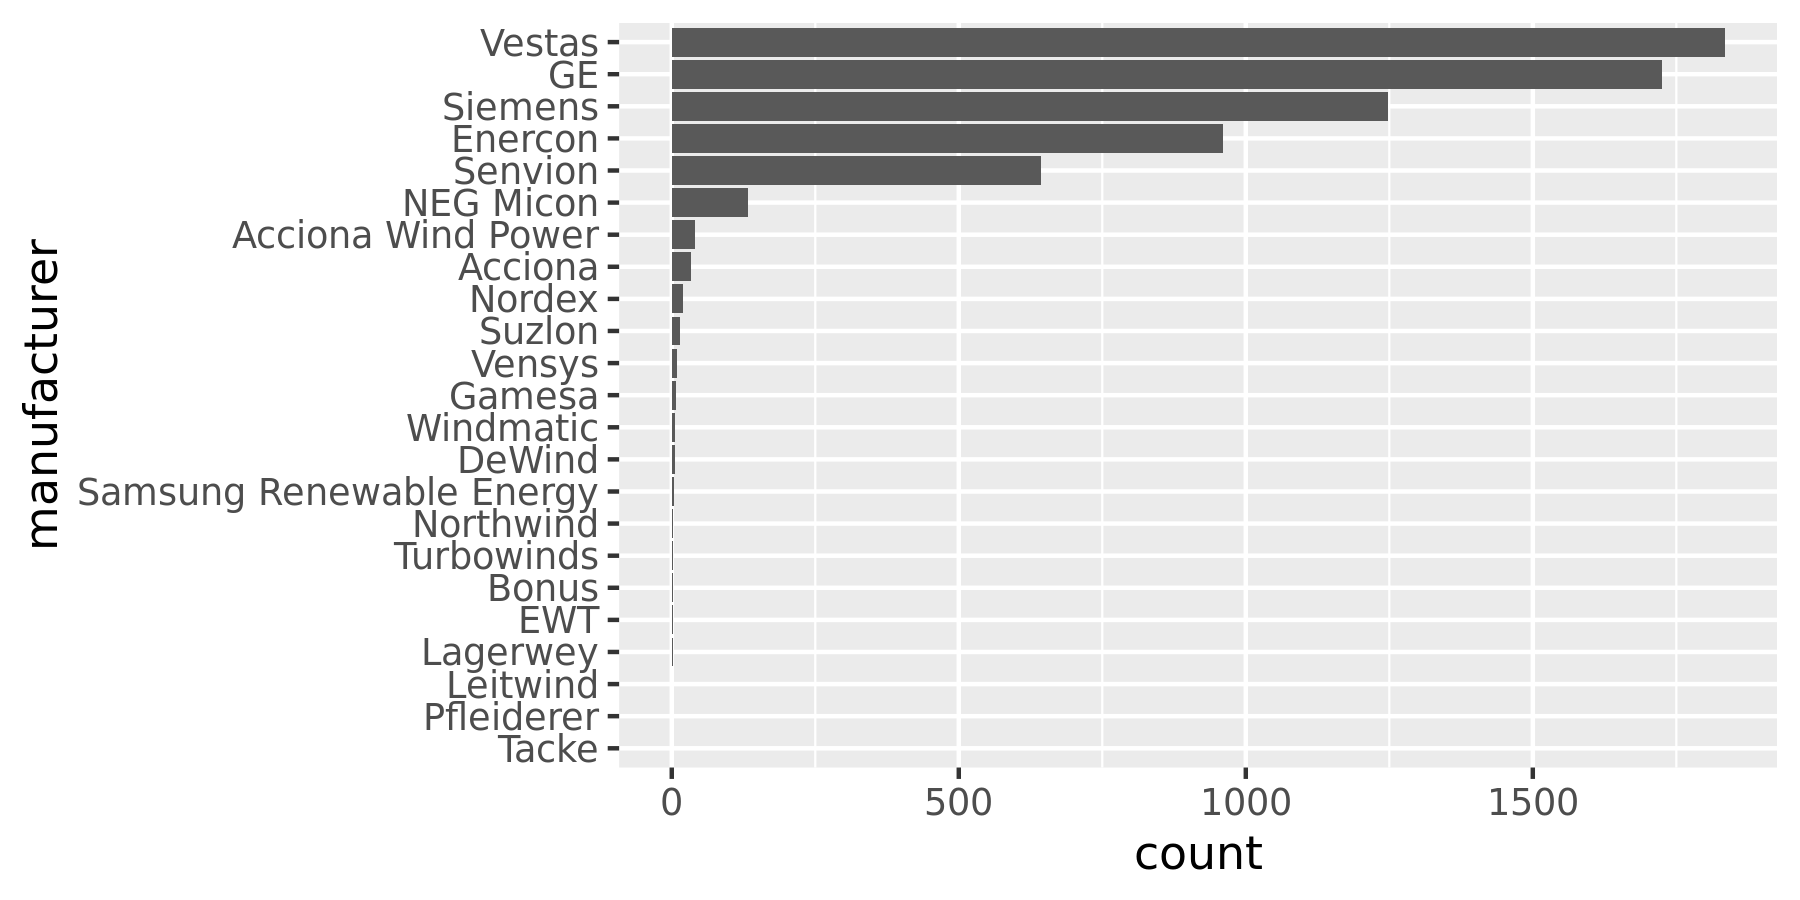

In [33]:
p1 = ggplot(canada_wind_turbine3, aes(y=manufacturer)) + geom_bar()
p1

### Bonus

In [21]:
bonus = canada_wind_turbine |>
    pull(manufacturer)
bonus

[1] "Bonus"                    "Vestas"                  
   [3] "Vestas"                   "Vestas"                  
   [5] "Vestas"                   "Vestas"                  
   [7] "Nordex"                   "Nordex"                  
   [9] "Nordex"                   "Nordex"                  
  [11] "Nordex"                   "Nordex"                  
  [13] "Nordex"                   "Nordex"                  
  [15] "Nordex"                   "Nordex"                  
  [17] "Nordex"                   "Nordex"                  
  [19] "Nordex"                   "Nordex"                  
  [21] "Nordex"                   "Enercon"                 
  [23] "Vestas"                   "Nordex"                  
  [25] "Nordex"                   "Nordex"                  
  [27] "Nordex"                   "Nordex"                  
  [29] "Vestas"                   "Vestas"                  
  [31] "Vestas"                   "Vestas"                  
  [33] "Vestas"                   "Vestas"                  
  [35] "Vestas"                   "Vestas"                  
  [37] "Vestas"                   "Vestas"                  
  [39] "Vestas"                   "Vestas"                  
  [41] "Vestas"                   "Vestas"                  
  [43] "Vestas"                   "Vestas"                  
  [45] "Vestas"                   "Vestas"                  
  [47] "Vestas"                   "Vestas"                  
  [49] "Vestas"                   "Vestas"                  
  [51] "Vestas"                   "Vestas"                  
  [53] "Vestas"                   "Vestas"                  
  [55] "Vestas"                   "Vestas"                  
  [57] "Vestas"                   "Vestas"                  
  [59] "Vestas"                   "Vestas"                  
  [61] "Vestas"                   "Vestas"                  
  [63] "Vestas"                   "Vestas"                  
  [65] "Vestas"                   "Vestas"                  
  [67] "Vestas"                   "Vestas"                  
  [69] "Vestas"                   "Vestas"                  
  [71] "Vestas"                   "Vestas"                  
  [73] "Vestas"                   "Vestas"                  
  [75] "Vestas"                   "Vestas"                  
  [77] "Vestas"                   "Vestas"                  
  [79] "Vestas"                   "Vestas"                  
  [81] "Vestas"                   "Vestas"                  
  [83] "Vestas"                   "Vestas"                  
  [85] "Vestas"                   "Vestas"                  
  [87] "Vestas"                   "Vestas"                  
  [89] "Vestas"                   "Vestas"                  
  [91] "Vestas"                   "Vestas"                  
  [93] "Vestas"                   "Vestas"                  
  [95] "Vestas"                   "Vestas"                  
  [97] "Vestas"                   "Vestas"                  
  [99] "Vestas"                   "Vestas"                  
 [101] "Vestas"                   "Vestas"                  
 [103] "Vestas"                   "Vestas"                  
 [105] "Vestas"                   "Vestas"                  
 [107] "Vestas"                   "Vestas"                  
 [109] "Vestas"                   "Vestas"                  
 [111] "Vestas"                   "Vestas"                  
 [113] "Vestas"                   "Vestas"                  
 [115] "Vestas"                   "Vestas"                  
 [117] "Vestas"                   "Vestas"                  
 [119] "Vestas"                   "Vestas"                  
 [121] "Vestas"                   "Vestas"                  
 [123] "Vestas"                   "Vestas"                  
 [125] "Vestas"                   "Vestas"                  
 [127] "Vestas"                   "Vestas"                  
 [129] "Vestas"                   "Vestas"                  
 [131] "Vestas"                   "Ves

In [22]:
bonus %>% factor %>% levels

[1] "Acciona"                  "Acciona Wind Power"      
 [3] "Bonus"                    "DeWind"                  
 [5] "EWT"                      "Enercon"                 
 [7] "GE"                       "Gamesa"                  
 [9] "Lagerwey"                 "Leitwind"                
[11] "NEG Micon"                "Nordex"                  
[13] "Northwind"                "Pfleiderer"              
[15] "Samsung Renewable Energy" "Senvion"                 
[17] "Siemens"                  "Suzlon"                  
[19] "Tacke"                    "Turbowinds"              
[21] "Vensys"                   "Vestas"                  
[23] "Windmatic"

In [23]:
bonus %>% table

.
                 Acciona       Acciona Wind Power                    Bonus 
                      34                       40                        2 
                  DeWind                      EWT                  Enercon 
                       5                        2                      960 
                      GE                   Gamesa                 Lagerwey 
                    1725                        8                        2 
                Leitwind                NEG Micon                   Nordex 
                       1                      132                       20 
               Northwind               Pfleiderer Samsung Renewable Energy 
                       3                        1                        4 
                 Senvion                  Siemens                   Suzlon 
                     643                     1248                       15 
                   Tacke               Turbowinds                   Vensys 
          

In [24]:
bonus |> fct_infreq()|> levels()

[1] "Vestas"                   "GE"                      
 [3] "Siemens"                  "Enercon"                 
 [5] "Senvion"                  "NEG Micon"               
 [7] "Acciona Wind Power"       "Acciona"                 
 [9] "Nordex"                   "Suzlon"                  
[11] "Vensys"                   "Gamesa"                  
[13] "Windmatic"                "DeWind"                  
[15] "Samsung Renewable Energy" "Northwind"               
[17] "Turbowinds"               "Bonus"                   
[19] "EWT"                      "Lagerwey"                
[21] "Leitwind"                 "Pfleiderer"              
[23] "Tacke"

In [19]:
#Other
manufacturer_col |> fct_lump(n=10) |> table()


           Acciona Acciona Wind Power            Enercon                 GE 
                34                 40                960               1725 
         NEG Micon             Nordex            Senvion            Siemens 
               132                 20                643               1248 
            Suzlon             Vestas              Other 
                15               1834                 47 

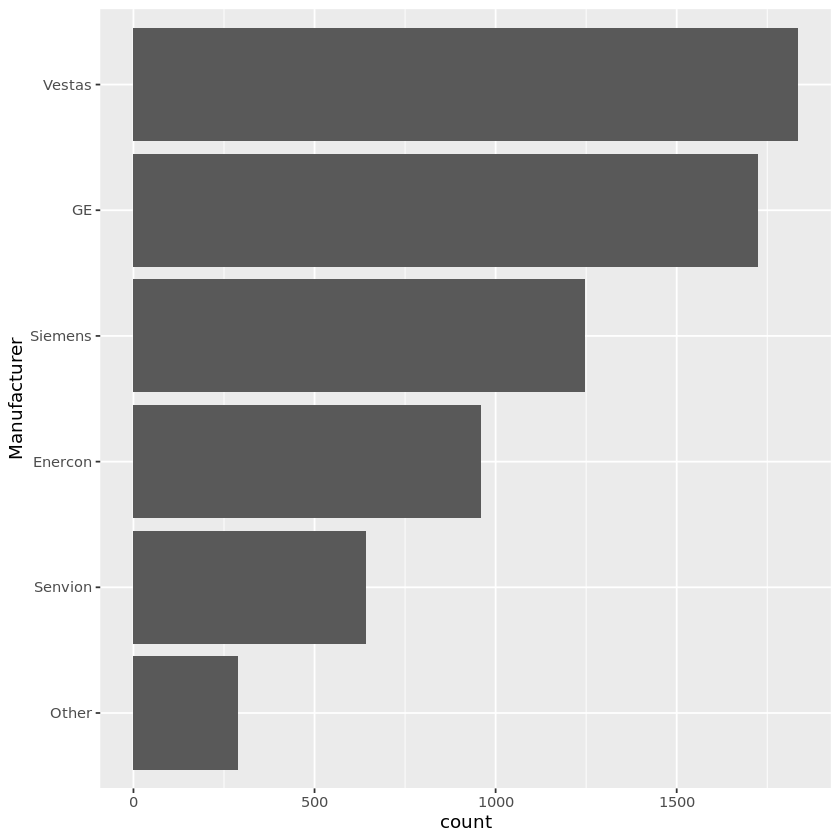

In [31]:
bonus = canada_wind_turbine %>%
    group_by(manufacturer) %>%
    mutate(n = n()) %>%
    ungroup() %>% # Why do we need to ungroup?
    arrange(n) %>%
    mutate(manufacturer = fct_lump(manufacturer, n = 5),
          Manufacturer = fct_inorder(manufacturer))
           
p2 = ggplot(bonus, aes(x = Manufacturer))

p2 = p2 + geom_bar() + coord_flip()

p2